In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
listings = pd.read_csv('listings.csv')

In [3]:
listings.shape

(25609, 75)

In [4]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27979,https://www.airbnb.com/rooms/27979,20241225160331,2024-12-26,previous scrape,"Easy going landlord,easy place",NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
1,47516,https://www.airbnb.com/rooms/47516,20241225160331,2024-12-26,city scrape,Beautiful waterfront house,NaN,NaN,https://a0.muscache.com/pictures/271998/b090ad...,214456,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,55681,https://www.airbnb.com/rooms/55681,20241225160331,2024-12-26,city scrape,Sathorn Terrace Apartment(61),NaN,NaN,https://a0.muscache.com/pictures/71205c61-1553...,263049,...,4.89,4.77,4.85,NaN,f,7,0,3,0,0.21
3,55686,https://www.airbnb.com/rooms/55686,20241225160331,2024-12-26,city scrape,Comfy bedroom near River pier & BTS Taksin.,This is one of our 'Escape' sleep room : hoste...,"Charoen krung street, River pier, Iconsiam, Su...",https://a0.muscache.com/pictures/efc8006f-02bb...,263049,...,4.85,4.74,4.69,NaN,f,7,0,3,0,1.24
4,105042,https://www.airbnb.com/rooms/105042,20241225160331,2024-12-26,city scrape,Central Bangkok 3 Bedroom Apartment,We are Airbnb Super Hosts. Book our apartment ...,Sukhumvit Rd is the shopping and restaurant di...,https://a0.muscache.com/pictures/50404407/23b0...,545890,...,4.89,4.86,4.76,NaN,f,1,1,0,0,0.91


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [7]:
print("\nMissing values per column:")
print(listings.isnull().sum())


Missing values per column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8814
Length: 75, dtype: int64


In [8]:
# Calculate percentage of missing values
print("\nPercentage of missing values:")
perc = round(listings.isnull().sum() / len(listings), 2) * 100

# Filter and display columns with missing values
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
description                       3.0
neighborhood_overview            62.0
host_location                    23.0
host_about                       42.0
host_response_time               15.0
host_response_rate               15.0
host_acceptance_rate             15.0
host_is_superhost                 5.0
host_neighbourhood               64.0
neighbourhood                    62.0
neighbourhood_group_cleansed    100.0
bathrooms                        20.0
bedrooms                          5.0
beds                             20.0
price                            20.0
calendar_updated                100.0
has_availability                  8.0
first_review                     34.0
last_review                      34.0
review_scores_rating             34.0
review_scores_accuracy           34.0
review_scores_cleanliness        34.0
review_scores_checkin            34.0
review_scores_communication      34.0
review_scores_location           34.0
review_scores_value

In [9]:
# Drop columns with >50% missing values
listings = listings.drop(columns=['neighborhood_overview', 'host_neighbourhood', 'neighbourhood','neighbourhood_group_cleansed','calendar_updated','license'])

In [10]:
# Impute high missing value columns
listings['host_about'] = listings['host_about'].fillna("Not provided")

In [11]:
  # Impute moderate missing value columns
listings['host_location'] = listings['host_location'].fillna("Unknown")
listings['host_response_time'] = listings['host_response_time'].fillna("Not specified")
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mode()[0])
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mode()[0])
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])

In [12]:
# Impute low missing value columns
listings['description'] = listings['description'].fillna("No description")
listings['host_is_superhost'] = listings['host_is_superhost'].fillna("Not specified")
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].median())
listings['has_availability'] = listings['has_availability'].fillna("No description")

In [13]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/0f/4l5yr1gx3xn88xhbz1m_1v140000gn/T/ipykernel_28750/3781501493.py:1: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
listings['price'] = listings['price'].fillna(listings['price'].median())

In [15]:
# Convert date columns to datetime
listings['first_review'] = pd.to_datetime(listings['first_review'], errors='coerce')
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

In [16]:
# Impute review-related columns
review_columns = ['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in review_columns:
    listings[col] = listings[col].fillna(listings[col].median())

# Verify missing values after imputation
print("\nMissing values after imputation:")
print(listings.isnull().sum())


Missing values after imputation:
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 69, dtype: int64


##  Geospatial plot

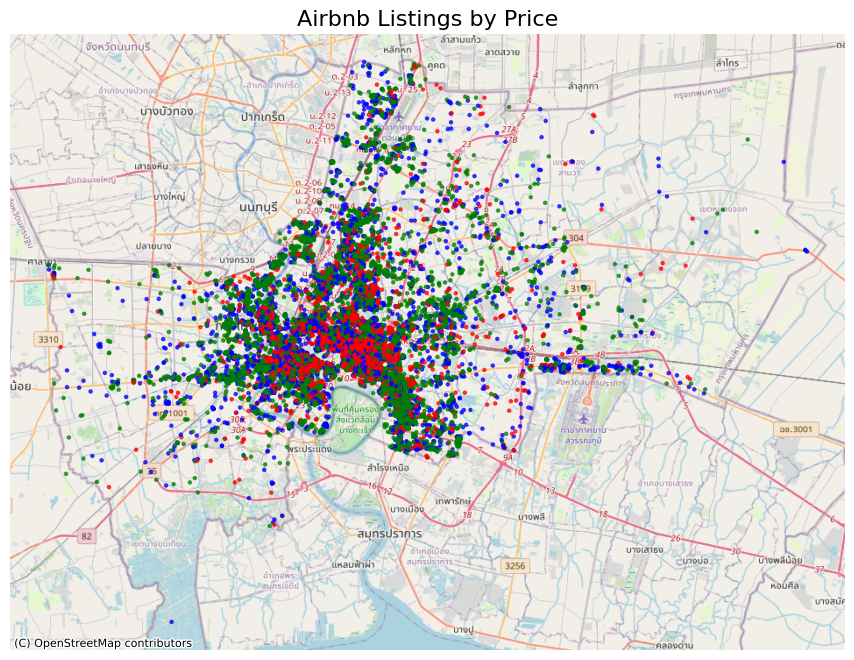

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Convert latitude and longitude into Point geometries
listings['geometry'] = [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
gdf = gpd.GeoDataFrame(listings, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Assign colors based on price
gdf['color'] = gdf['price'].apply(lambda p: 'green' if p < 1800.000000 else 'blue' if p < 2657.000000 else 'red')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()

## Univariate Analysis

In [18]:
listings.price.describe()

count      25609.000000
mean        3129.235347
std        15400.290336
min           69.000000
25%         1257.000000
50%         1800.000000
75%         2657.000000
max      1000000.000000
Name: price, dtype: float64

### Detecting outliers in the price column

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = listings[(listings['price'] < lower_bound) | (listings['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

print("\nOutlier prices:")
print(outliers['price'].describe())

#  Remove outliers
listings_cleaned = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

Number of outliers in 'price': 2741

Outlier prices:
count       2741.000000
mean       14049.757753
std        45566.698474
min         4758.000000
25%         5786.000000
50%         7876.000000
75%        11779.000000
max      1000000.000000
Name: price, dtype: float64


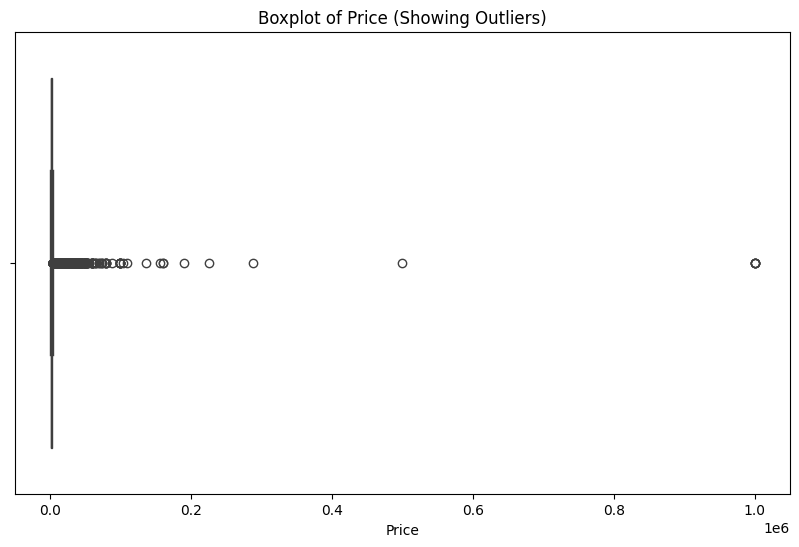

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=listings['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

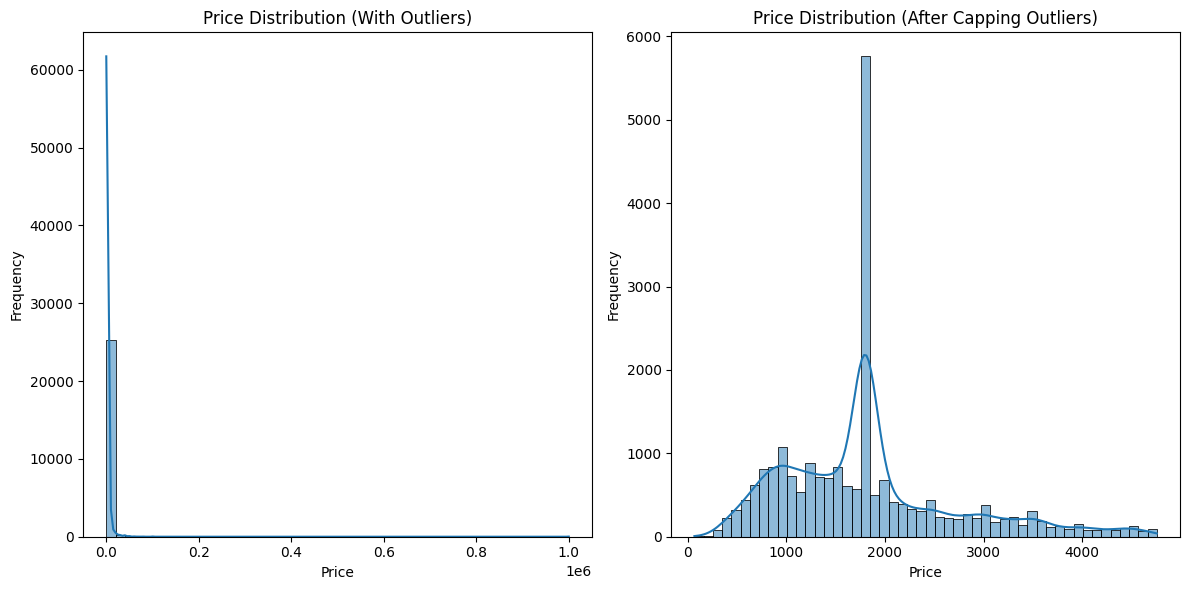

In [21]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##  Price distribution after handling outliers

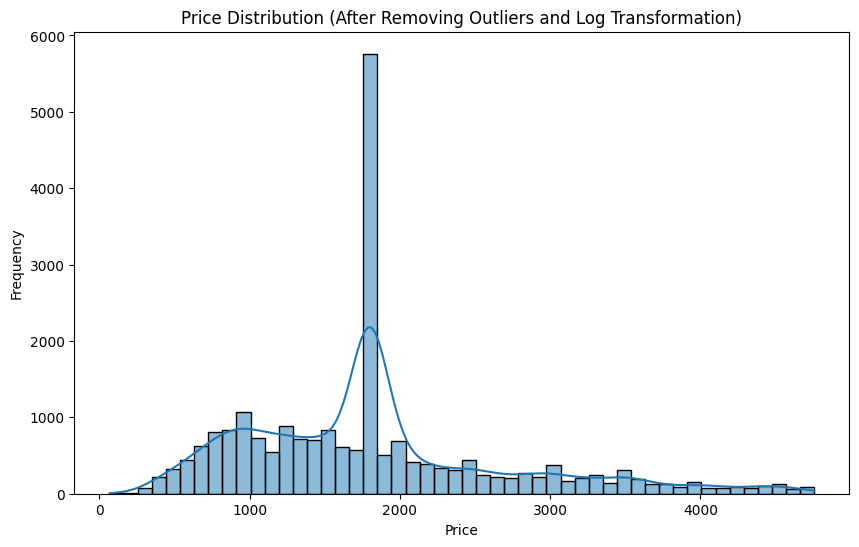

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Removing Outliers and Log Transformation)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

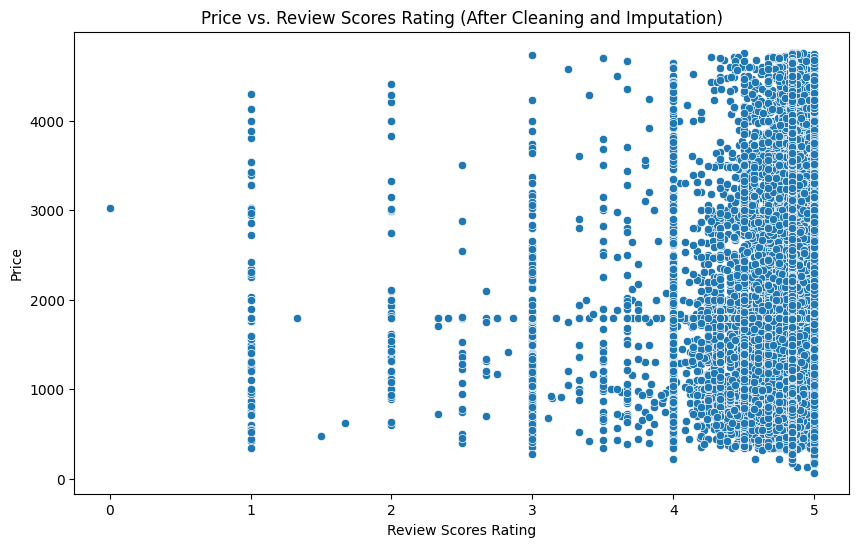

In [23]:
# Price vs. Review Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings_cleaned)
plt.title('Price vs. Review Scores Rating (After Cleaning and Imputation)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

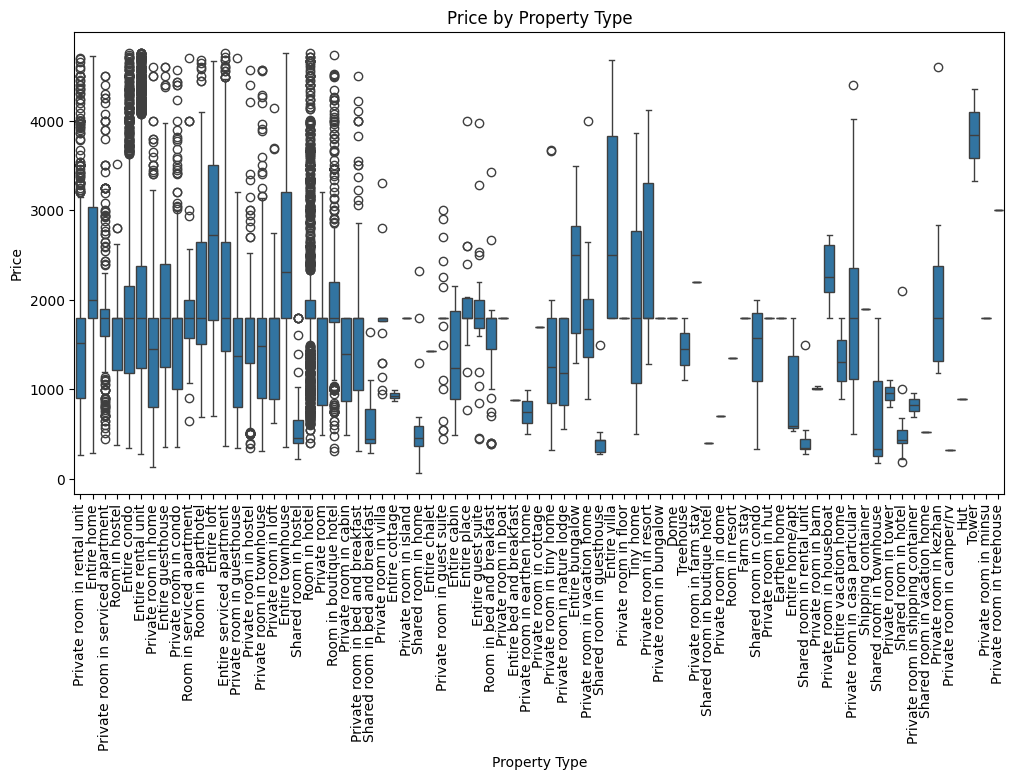

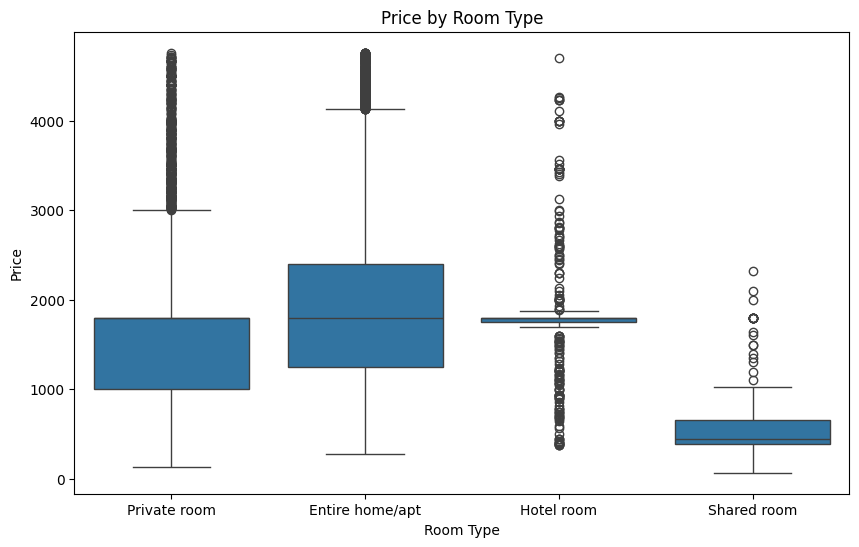

In [24]:
# Price by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=listings_cleaned)
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [25]:
import numpy as np

def calculate_bins(data, method='sturges'):
    """
    Calculate the number of bins for a histogram based on the specified method.

    Parameters:
        data (array-like): The dataset for which bins are to be calculated.
        method (str): The method to use for calculating bins. Options are:
                      - 'sturges' (default): Sturges' Rule
                      - 'sqrt': Square Root Rule
                      - 'fd': Freedman-Diaconis Rule

    Returns:
        int: The number of bins.
    """
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [26]:
sbins = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins = calculate_bins(listings_cleaned.price , method = 'fd')

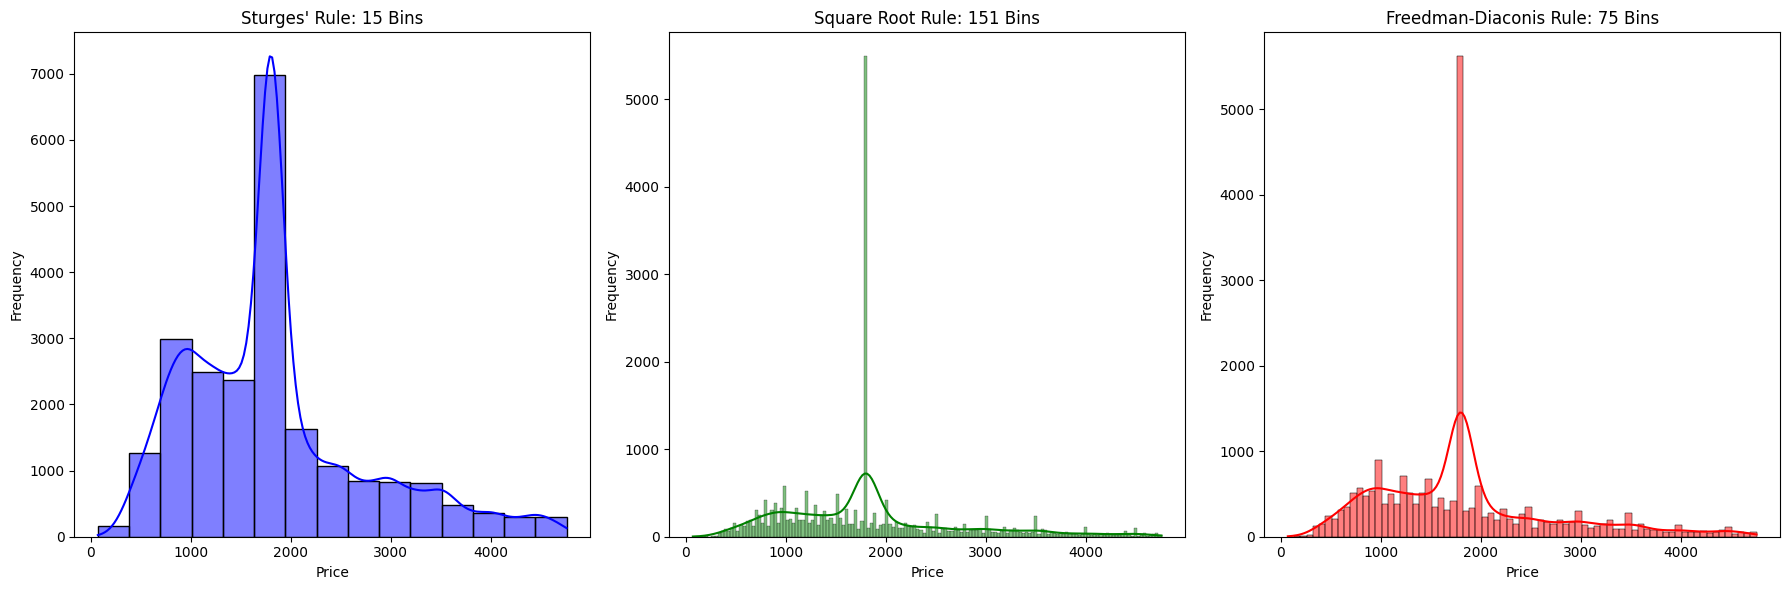

In [27]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

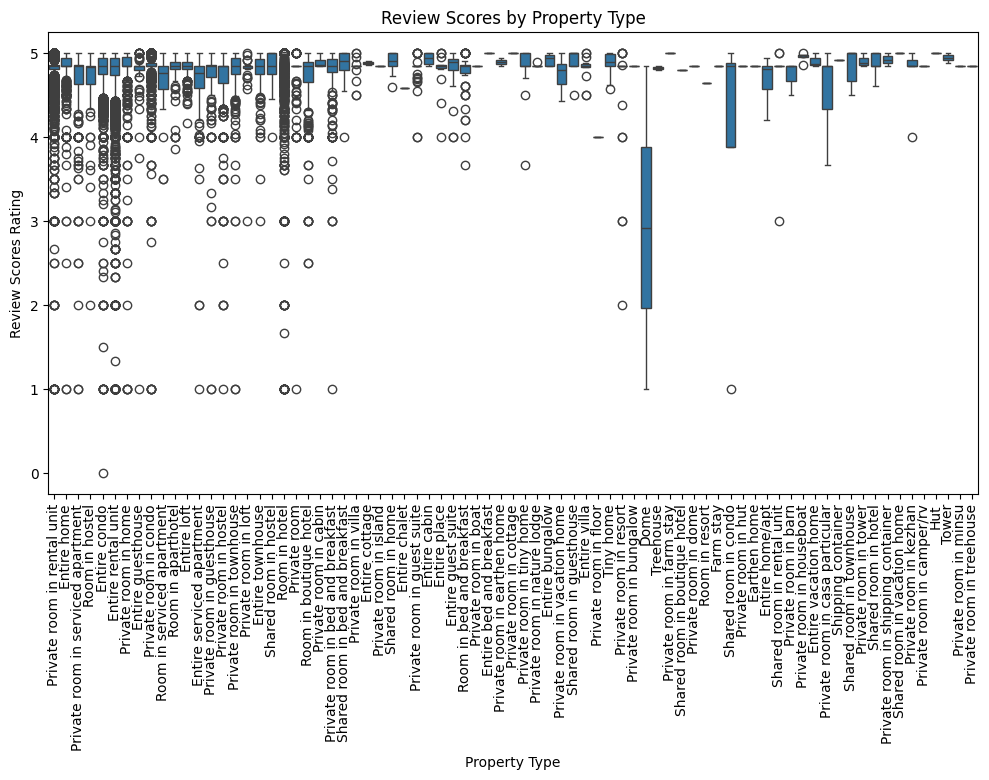

In [28]:
# Review Scores by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='review_scores_rating', data=listings_cleaned)
plt.title('Review Scores by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=90)
plt.show()

##  Multivariate Analysis

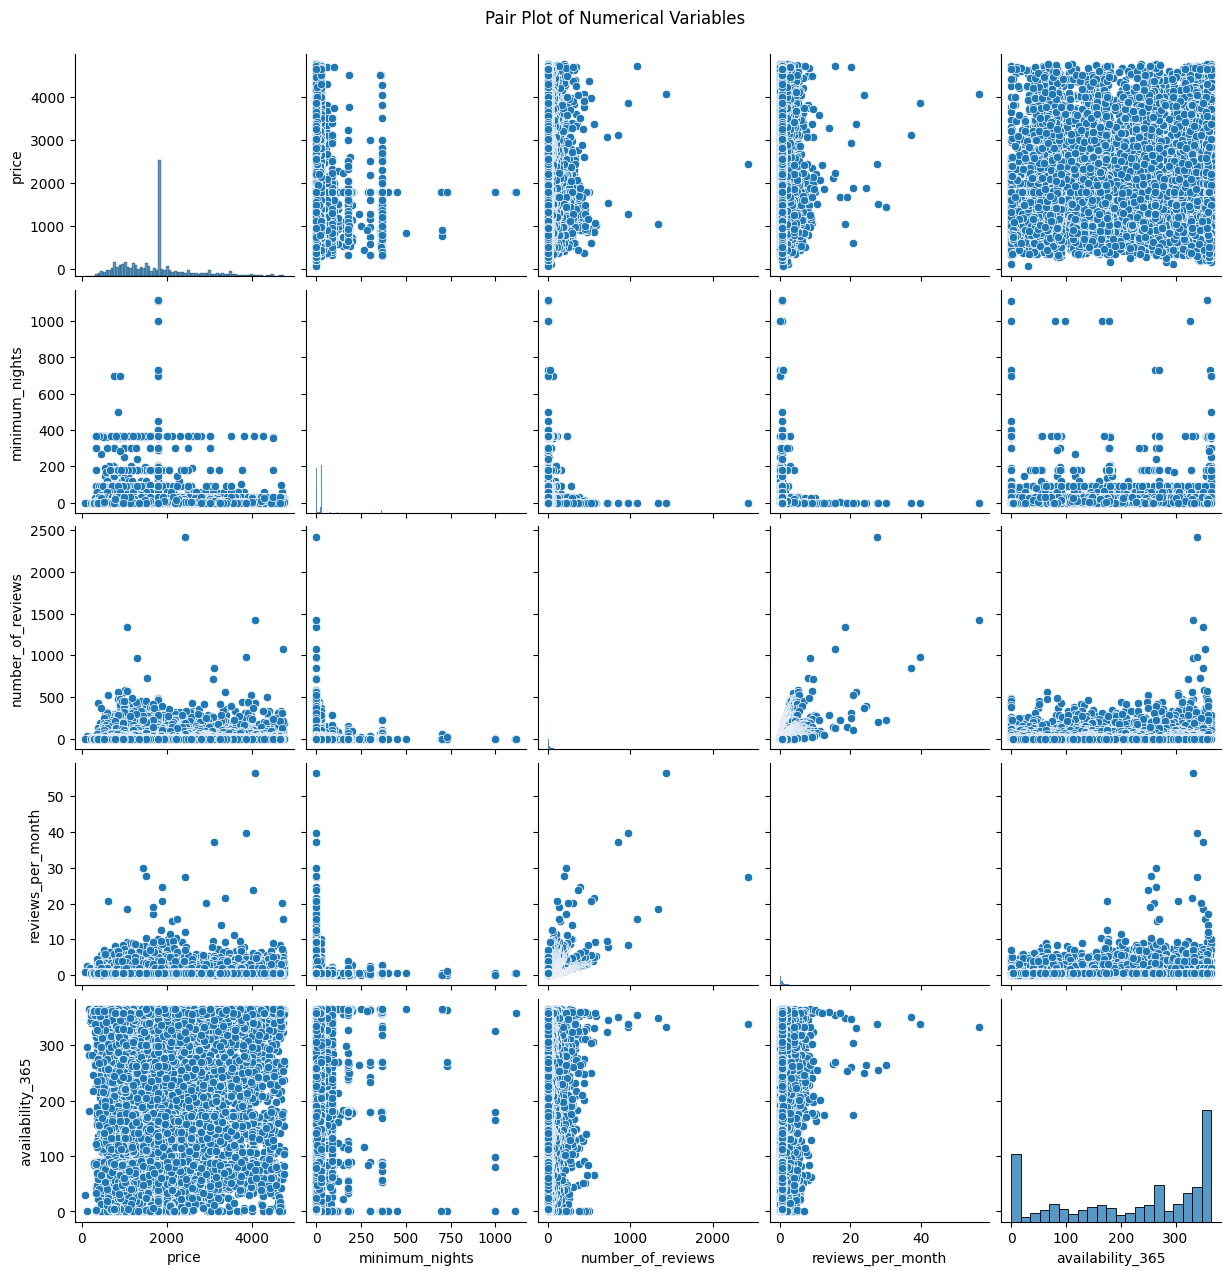

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create pair plot
sns.pairplot(listings_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

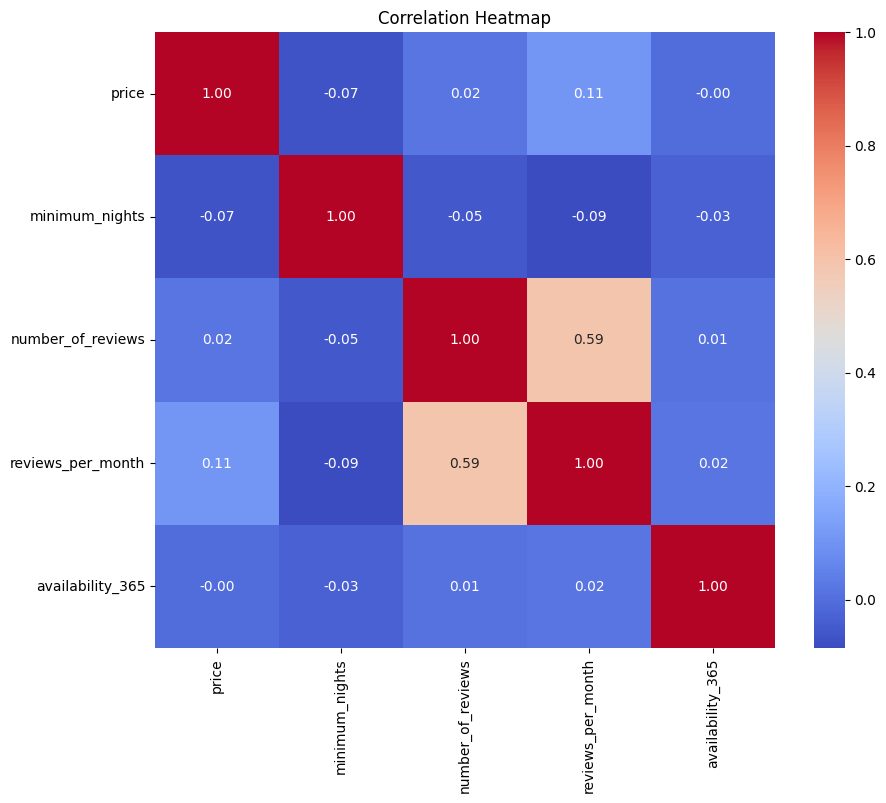

In [30]:
# Calculate correlation matrix
corr_matrix = listings_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

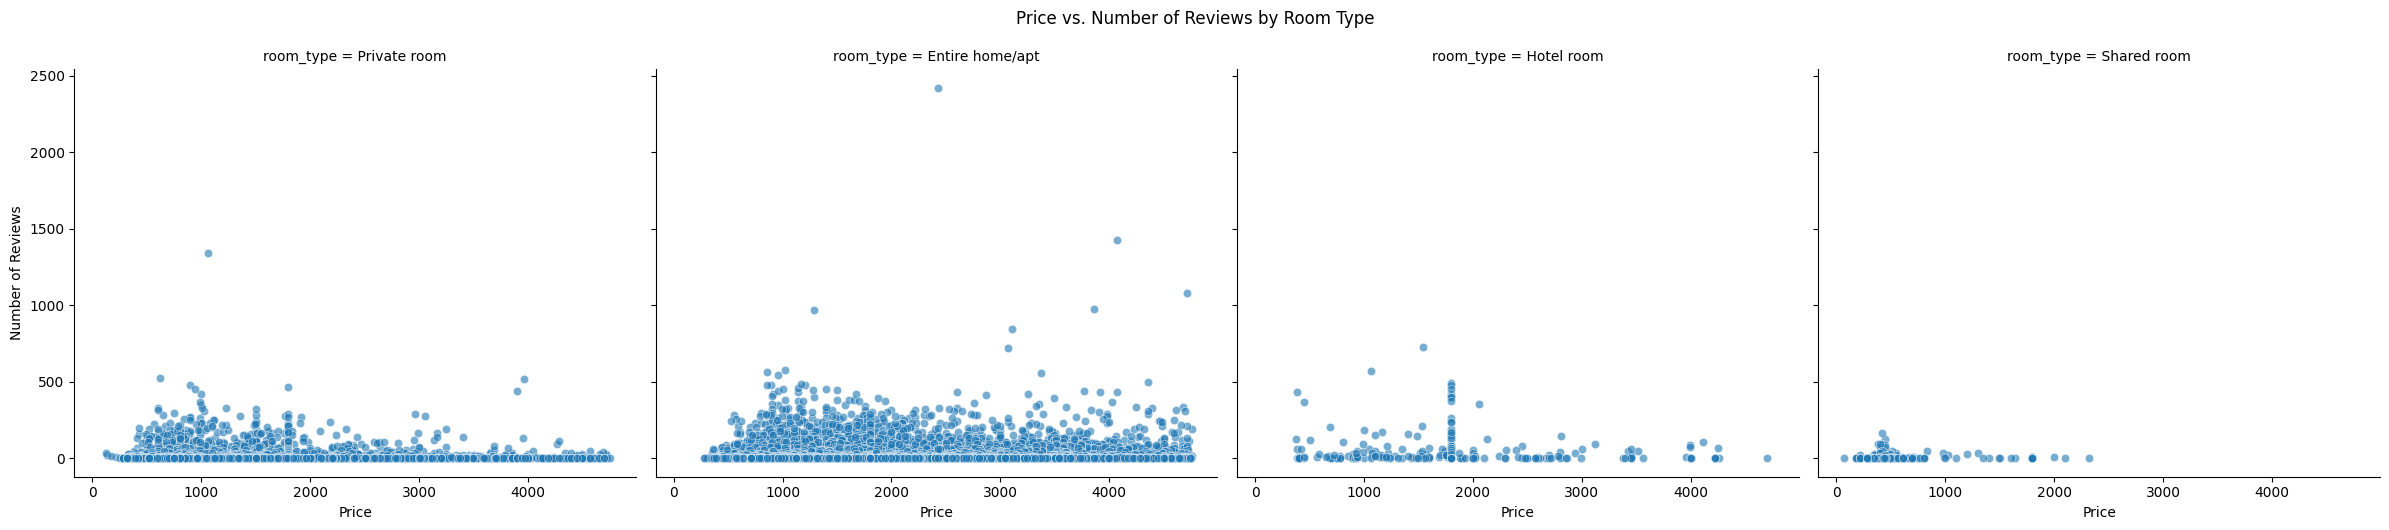

In [31]:
# Faceted scatter plot: Price vs. Number of Reviews, faceted by Room Type
g = sns.FacetGrid(listings_cleaned, col='room_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'price', 'number_of_reviews', alpha=0.6)
g.set_axis_labels('Price', 'Number of Reviews')
g.fig.suptitle('Price vs. Number of Reviews by Room Type', y=1.05)
plt.show()